<H1>Data diri : <H1>

<p>Nama : Muh. Azhar Tawakkal<br>
TTL  : Kendari, 27 Mei 2002<br>
Email : azhartawakkalneeds@gmail.com<br>
Kampus : Universitas Hasanuddin

In [ ]:
import pandas as pd
df = pd.read_csv('/content/cyberbullying_tweets.csv')
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
category = pd.get_dummies(df.cyberbullying_type)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='cyberbullying_type')
df_baru.head()

,tweet_text,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
0,"In other words #katandandre, your food was cra...",0,0,0,1,0,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,0,0,1,0,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0,0,0,1,0,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,0,0,1,0,0
4,@RudhoeEnglish This is an ISIS account pretend...,0,0,0,1,0,0


In [ ]:
tweet = df_baru['tweet_text'].values
label = df_baru[['age', 'ethnicity', 'gender', 'not_cyberbullying', 'other_cyberbullying', 'religion']].values
label

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split
tweet_latih, tweet_test, label_latih, label_test = train_test_split(tweet, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(tweet_latih) 
tokenizer.fit_on_texts(tweet_test)
 
sekuens_latih = tokenizer.texts_to_sequences(tweet_latih)
sekuens_test = tokenizer.texts_to_sequences(tweet_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=50000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nAkurasi telah mencapai >85%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
num_epochs = 10
hist = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/10
1193/1193 - 660s - loss: 0.8606 - accuracy: 0.6138 - val_loss: 0.5022 - val_accuracy: 0.7903 - 660s/epoch - 553ms/step
Epoch 2/10
1193/1193 - 654s - loss: 0.5019 - accuracy: 0.7888 - val_loss: 0.4479 - val_accuracy: 0.8093 - 654s/epoch - 548ms/step
Epoch 3/10
1193/1193 - 648s - loss: 0.4123 - accuracy: 0.8231 - val_loss: 0.5286 - val_accuracy: 0.7869 - 648s/epoch - 543ms/step
Epoch 4/10
1193/1193 - 649s - loss: 0.3947 - accuracy: 0.8327 - val_loss: 0.4510 - val_accuracy: 0.8152 - 649s/epoch - 544ms/step
Epoch 5/10
1193/1193 - 647s - loss: 0.3663 - accuracy: 0.8445 - val_loss: 0.4469 - val_accuracy: 0.8207 - 647s/epoch - 543ms/step
Epoch 6/10

Akurasi telah mencapai >85%!
1193/1193 - 645s - loss: 0.3481 - accuracy: 0.8533 - val_loss: 0.4602 - val_accuracy: 0.8158 - 645s/epoch - 541ms/step


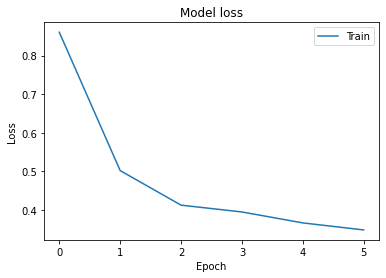

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

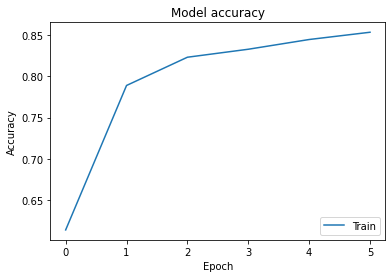

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()